<a href="https://colab.research.google.com/github/maleal2/Assignment-1.1-Image-Processing-and-Neural-Networks/blob/main/MariaLeal_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- **Name**: Maria Carolina Leal Cardenas
- **Date**: 10/27/2024.

# Part 1 NN Model:

**1. Read the Fashion-MNIST dataset into Python**.

- Draw the first 16 data (images) from the training data while showing the name of each image (label of it) under the image.
- Normalize the data (both train and test).
- Create the model here. It should be an NN model with on hidden layer (128 nodes) and Relu activation function. What should be the output activation function ?
- Start training the model. We have 20% for validation, 20 epochs, and  batch sizes are 128.
- Draw the learning curves and write down your understanding from the graphs.
What is your suggestion to resolve the issue that you see?

In [24]:
# Loading the Fashion-MNIST dataset.
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(x_train_img, y_train_labels), (x_test_img, y_test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

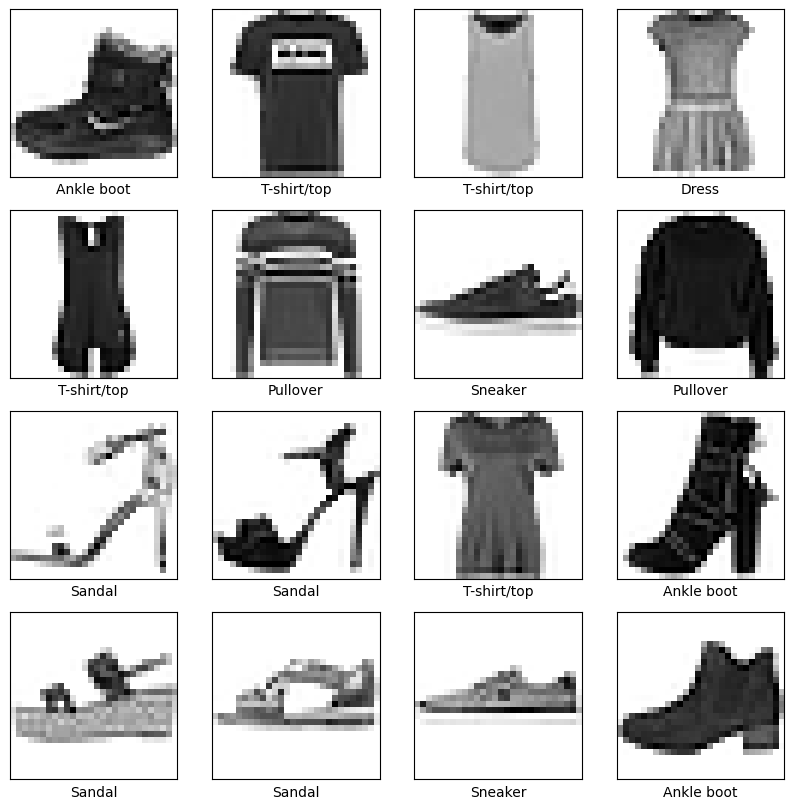

In [25]:
# Drawing the first 16 images.
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for a in range(16):
    plt.subplot(4,4,a+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_img[a], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_labels[a]])
plt.show()


## (Optional). Drawing 49 images of the training set.

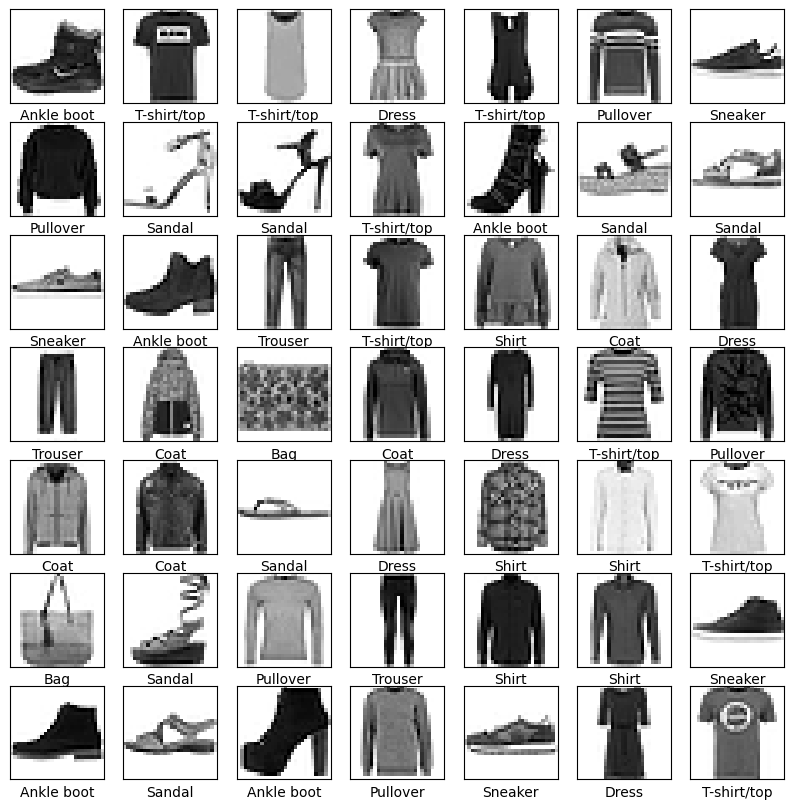

In [26]:
plt.figure(figsize=(10,10))
for a in range(49):
    plt.subplot(7,7,a+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_img[a], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_labels[a]])
plt.show()


In [27]:
# Normalizing the data.
x_train_img = x_train_img / 255.0
x_test_img = x_test_img / 255.0

In [28]:
# Building the NN (Neural Network) model.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential ([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Why using "softmax" function in the output later for the NN model ?**

- The fashion-MNIST dataset contains 10 different classes. This is a multi-class classification problem, where each input image belongs to one of these 10 classes.
- The softmax function is ideal for multi-class classification tasks because it converts the raw output scores from the NN into probabilities, with each class probability ranging between 0 and 1.
- Softmax takes the output of each neuron in the final layer and transforms them in such a way that they represent the probability distribution across all classes. In other words, if the model predicts probabilities [0.1, 0.2, 0.05, ...., 0.5], the highest probability (0.5 in this case) corresponds to the most likely class.
- Additionally, softmax ensures that the sum of all output probabilities is 1, which is crucial for classification tasks. This property allows to interpret the output as a probability distribution over the 10 classes.
- Finaly, we cannot use sigmoid since it outputs values between 0 and 1 for each neuron independently, but does not ensure that the probabilities across all classes sum to 1. This function is typically used for binary classification problems; Relu is generally used in hidden layers for its computational efficiency and ability to avoid gradient vanishing issues.

In [29]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Training the model.
history = model.fit(x_train_img, y_train_labels, epochs= 20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7336 - loss: 0.7842 - val_accuracy: 0.8497 - val_loss: 0.4379
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8500 - loss: 0.4271 - val_accuracy: 0.8591 - val_loss: 0.4123
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8648 - loss: 0.3817 - val_accuracy: 0.8673 - val_loss: 0.3741
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8728 - loss: 0.3568 - val_accuracy: 0.8697 - val_loss: 0.3681
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8818 - loss: 0.3316 - val_accuracy: 0.8712 - val_loss: 0.3709
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8835 - loss: 0.3161 - val_accuracy: 0.8788 - val_loss: 0.3426
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8925 - loss: 0.2958 - val_accuracy: 0.8788 - val_loss: 0.3374
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8944 - loss: 0.2877 - val_accuracy: 0.

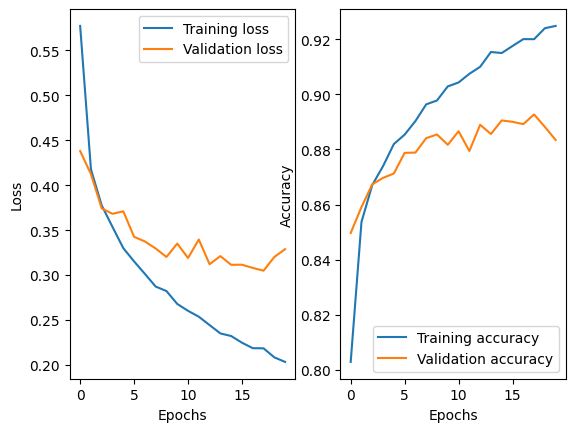

In [32]:
# Plotting learning curve.

# Loss plot
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label ='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label ='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Analysis and suggestions

From the above graphs and results, it is evident that the training loss steadily decreases, indicating that the model is learning the patterns within the training data. On another hand, the validation loss stops decreasing at a certain point and fluctuates slightly. This is a sign the the model is overfitting as it performs better on the training dataset than on the validation set.

For addressing the overfitting issue and potentially improve the validation accuracy, we can consider to add "droput layers", by introducing dropout in the hidden layers, we can randomly drop a fraction of the neurons during training. For example, Dropout(0.5), after hidden layer, will drop 50% of the neurons.

Additionally, we can apply L2 regularization in the dense layer to penalize large weights, which helps in controlling overfitting.

Finally, we can add "early_stop", to automatically stop training when the validation loss stops improving.

# Part 2 TensorFLow

**2. There is a set of flower images stored in the Tensorflow repository. We start with transferring the data to out VM on Colab**.

- a). Let's start with counting the total number of images in this dataset. There are 5 subfolders in this dataset each containing different types of flowers.
- b). You can look into any of the subfolders to see images stored over there. You can look into the folder using: data_dir.glob('tulip/*')
  
  For this part use Pillow (PIL) to show at least one flower from each subfolder.
- c). One issue that we often have with images is that the images in a folder may have different dimensions and this affects the model that we use later on for classification. To address this issue, we are going to use Keras to load the data and apply preprocessing techniques.

Now, convert the validation data into 180x180. Note the message that you receive from Python identifying the number of classes.

d). You can use the train_ds.class_names command to get the list of labels. Write a code to randomly show 9 images from training data while printing their label on top of the image.

Please carefully review the images. What are some barries that you can see in the images for having a proper classification?

e). Now, we want to use a preprocessing package in Keras to apply different filters to the iamge. Apply the following procedures to image data:

- Rescale the image by dividing by 255.
- Shear the image 20%
- Zoom the iamge 20%
- Horizontally flip images

In [50]:
import pathlib

# Downloading and extractubg the flowers dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname="flower_photos",
                                   untar=True)

# Setting the path to the extracted directory
data_directory = pathlib.Path(data_dir)

# Countting the number of images in each subdirectory
image_count = len(list(data_directory.glob('*/*.jpg')))
print(f"a.) Total images: {image_count}")


a.) Total images: 3670


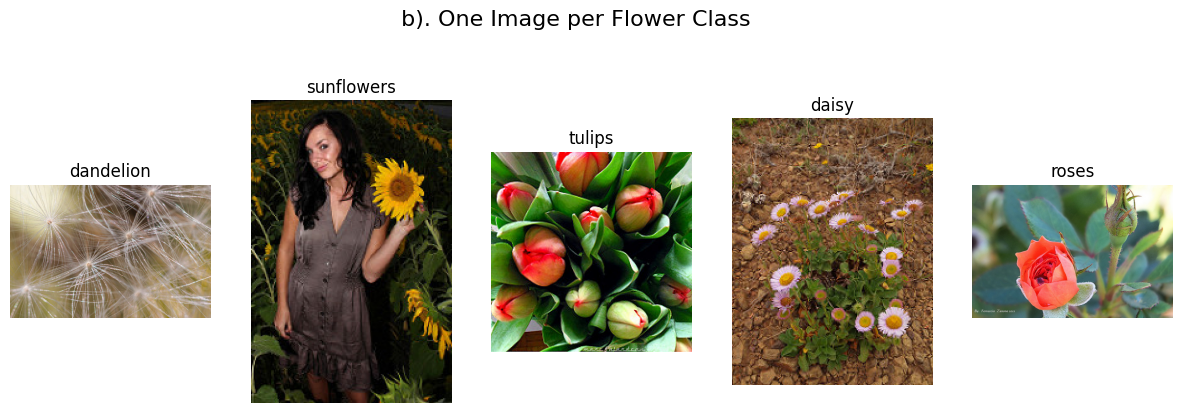

In [52]:
# Displaying one flower per directory.
from PIL import Image
import random


# Setting up the plot with subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
fig.suptitle(" b). One Image per Flower Class", fontsize=16)

# Iterate through each subdirectory in data_directory, using enumerate to access both index and value
i = 0  # Initialize index for subplot
for flower_class in data_directory.glob('*'):
    # Check if the path is indeed a directory (to avoid any non-directory files)
    if flower_class.is_dir() and i < 5:  # Limit to 5 classes
        # Get a list of all image files in the current subdirectory
        images = list(flower_class.glob('*.jpg'))

        # Only proceed if there are images in the directory
        if images:
            # Select a random image from the list
            random_image = random.choice(images)
            # Open the selected image
            img = Image.open(random_image)

            # Display the image in the subplot using the current index i
            axes[i].imshow(img)
            axes[i].set_title(flower_class.name)
            axes[i].axis('off')

            i += 1  # Increment index for the next subplot

plt.show()


In [56]:
# C). Resizing and rescaling images.
# Setting parameters
batch_size = 32
img_height = 180
img_width = 180

# Setting the path to the extracted directory
data_directory = pathlib.Path(data_dir)

# Loading the training dataset with a validation split
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    validation_split=0.2,           # 20% of data for validation
    subset="training",              # Loading the training split
    seed=123,                       # Seed for reproducibility
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

# Loading the validation dataset with the same validation split
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    validation_split=0.2,           # Same validation split percentage
    subset="validation",            # Loading the validation split
    seed=123,                       # Same seed for consistency
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

# Check the output
print(f"Training dataset: {len(train_ds)} batches")
print(f"Validation dataset: {len(val_ds)} batches")


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
Training dataset: 92 batches
Validation dataset: 23 batches


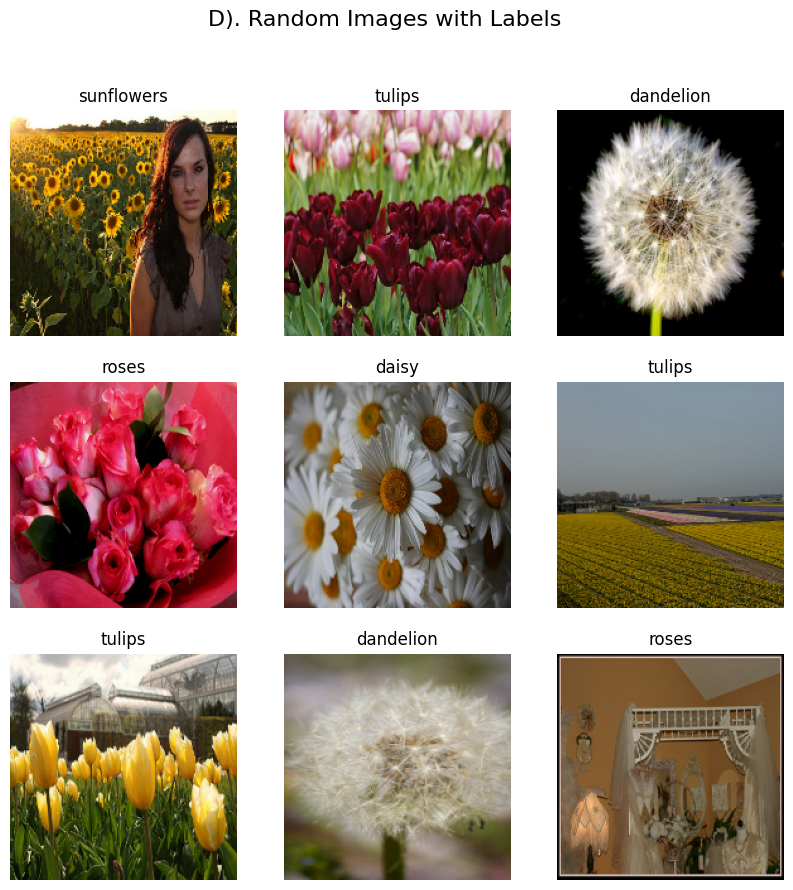

In [62]:
# D) Displaying 9 random images with labels
import matplotlib.pyplot as plt
import numpy as np

# Getting the class names
class_names = train_ds.class_names

# Setting up the plot with subplots
fig = plt.figure(figsize=(10, 10))  # Corrected figure initialization
fig.suptitle("D). Random Images with Labels", fontsize=16)  # Set the super title

for images, labels in train_ds.take(1):
    for i in range(9):
        # Randomly select an image
        ax = plt.subplot(3, 3, i + 1)
        ax.imshow(images[i].numpy().astype("uint8"))
        ax.set_title(class_names[labels[i]])
        ax.axis("off")

plt.show()


## Please carefully review the images. What are some barriers that you can see in images for having a proper classification?

1. Multiple objects in the frame:

- The image with roses in the bedroom contains various other objects, which can distract the model from focusing solely on the flower.
- Similarly, the sunflower field with a person introduces a human object that takes attention away from the flowers, potentially causing confusion.

2. Contextual and background complexity:

- The tulip field landscape shows tulips as part of a broader landscape, which might confusde the model as the flowers aren't the main focus or close-up.
- Backgrond complexity, like dense fields, can make it harder for the model to isolate relevant features of each flower type.

3. Varying sizes:

- Some images, like the dandelion close-up versuns the dandelion in the field , may show flowers at different zoom  levels and focus points. This variation can cause the model to focus on different features, making classification challenging.

4. Class similarly and object oberlaps:
- If classes are visually similar or contain overlapping elements, like the pinky roses and red/pink tulips, it could cause misclassification.

In [63]:
# e) Applying preprocessing filters with Keras.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setting up data augmentation
data_augmentation = ImageDataGenerator(
    rescale=1.0/255,         # Rescale images by dividing by 255
    shear_range=0.2,         # Shear images by 20%
    zoom_range=0.2,          # Zoom images by 20%
    horizontal_flip=True     # Horizontally flip images
)

# Applying the data augmentation on the training dataset
train_ds_augmented = data_augmentation.flow_from_directory(
    data_directory,          # Path to dataset
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset="training",
    shuffle=True,
    seed=123
)


Found 3670 images belonging to 5 classes.


# Part 3. Open CV
**3. Now use OpenCV for preprocessing**.

- a) Show the first 9 images in the dataset using OpenCV. Before showing each image, resize the images to 180x180

- b) Note that images are not in normal color. Convert images into colorful ones with normal coloring.

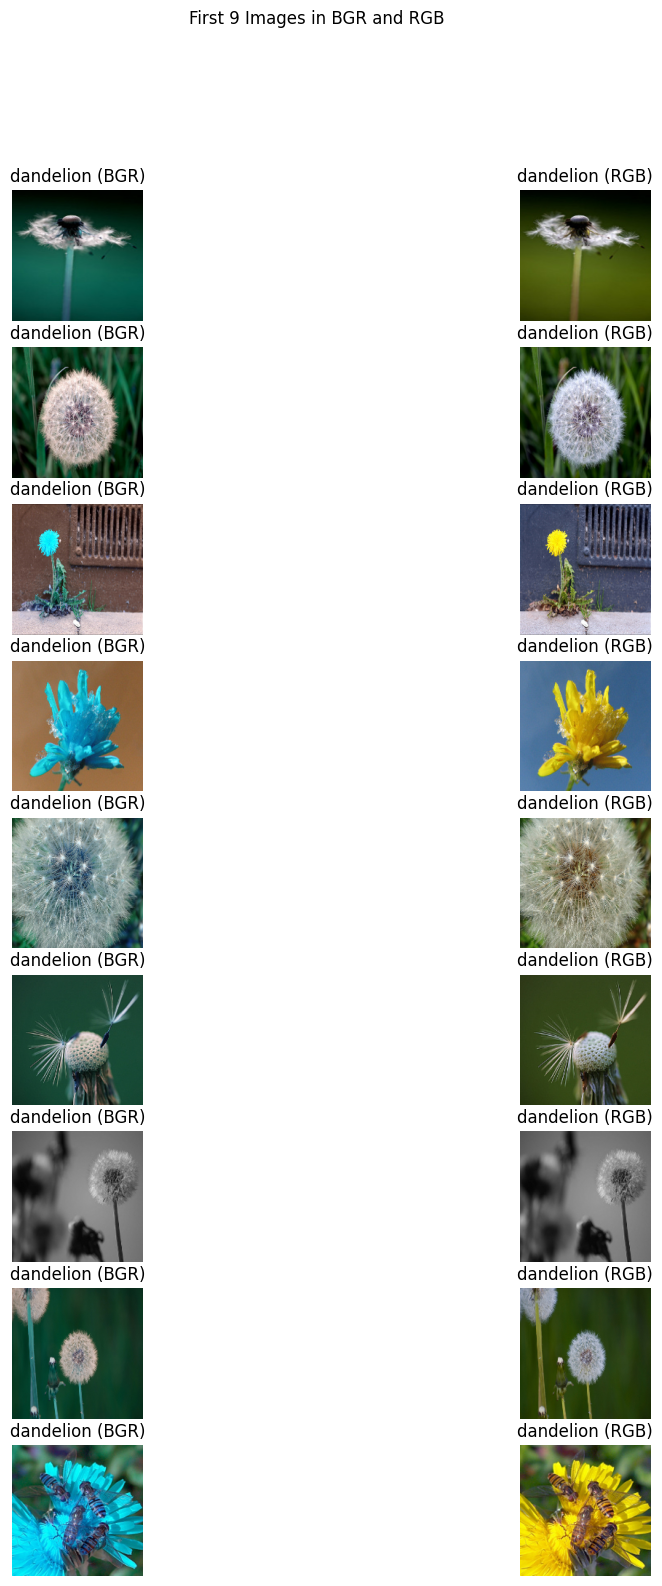

In [70]:
import cv2
import matplotlib.pyplot as plt
import pathlib

# Loading the first 9 images from the directory
image_paths = list(data_directory.glob('*/*.jpg'))[:9]

# Setting up a plot with 9 rows and 2 columns (BGR and RGB side by side for each image)
plt.figure(figsize=(12, 18))

for i, image_path in enumerate(image_paths):
    # Reading the image with OpenCV
    img_bgr = cv2.imread(str(image_path))

    # Resizing the image to 180x180
    img_resized_bgr = cv2.resize(img_bgr, (180, 180))

    # Converting the color from BGR to RGB
    img_rgb = cv2.cvtColor(img_resized_bgr, cv2.COLOR_BGR2RGB)

    # Displaying the BGR image
    ax = plt.subplot(9, 2, 2 * i + 1)
    ax.imshow(img_resized_bgr)
    ax.set_title(f"{image_path.parent.name} (BGR)")
    ax.axis("off")

    # Displaying the RGB image
    ax = plt.subplot(9, 2, 2 * i + 2)
    ax.imshow(img_rgb)
    ax.set_title(f"{image_path.parent.name} (RGB)")
    ax.axis("off")

plt.suptitle("First 9 Images in BGR and RGB")
plt.show()
